In [1]:
import pandas as pd

df = pd.read_csv('ex1data1.txt', names=['population','profit'], header=None)  #读取原始数据
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [2]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
import matplotlib.pyplot as plt

#获取第一列人口数据
c1 = df['population'].to_list()

#获取第二列利润数据
c2 = df['profit'].to_list()

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Analysis of ex1data1')
ax1.set_xlabel('population')
ax1.set_ylabel('profit')
ax1.scatter(c1, c2, marker='*')

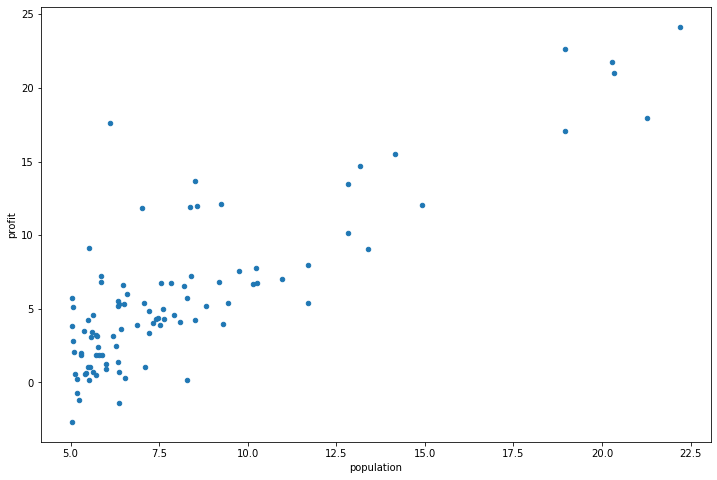

In [4]:
import matplotlib.pyplot as plt
#直接用df.plot绘图
df.plot(kind='scatter', x='population', y='profit', figsize=(12,8))
plt.show()

下面这部分用来计算代价函数$J\left( \theta  \right)$

In [5]:
import numpy as np

def computeCost(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(x))

加入一列全一数据，准备之后的向量运算，其实该列中每个1就是之后与$\theta_{0}$相乘的数据

In [6]:
df.insert(0, 'Ones', 1)
df

,Ones,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [7]:
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [8]:
x.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [11]:
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
print(computeCost(x,y,theta))     #计算theta初值为0时的代价函数值

32.072733877455676


$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta \right)$$

In [18]:
def gradientDescent(x, y, alpha, theta, iters):
    temp = np.matrix(np.zeros(theta.shape))  #暂存更新后的theta值
    paras = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = x * theta.T - y
        
        for j in range(paras):
            term = np.multiply(error, x[:,j])
            temp[0,j] = temp[0,j] - (alpha / len(x)) * np.sum(term)
            
        theta = temp
        cost[i] = computeCost(x, y, theta)
    
    return theta,cost
    

In [19]:
alpha = 0.01
iters = 1000

In [20]:
result, cost = gradientDescent(x, y ,alpha, theta, iters)
result

matrix([[-3.24140214,  1.1272942 ]])

得到的参数的误差

In [21]:
computeCost(x, y, result)

4.515955503078912

可视化

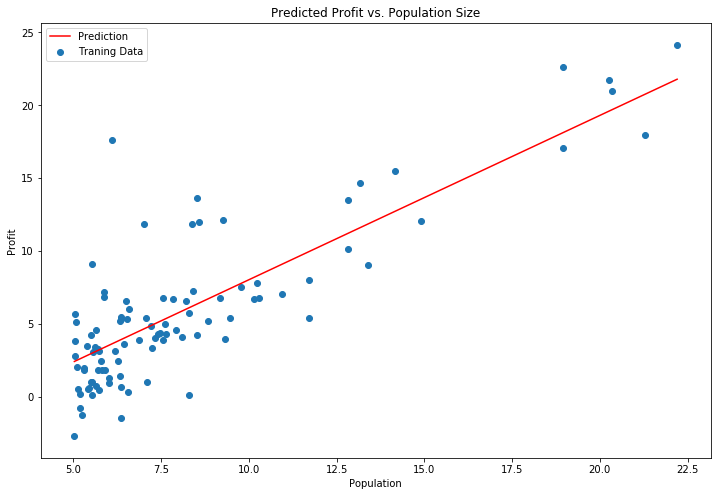

In [33]:
x = np.linspace(df.population.min(), df.population.max(), 100)
f = result[0, 0] + (result[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

可视化每一次迭代的误差

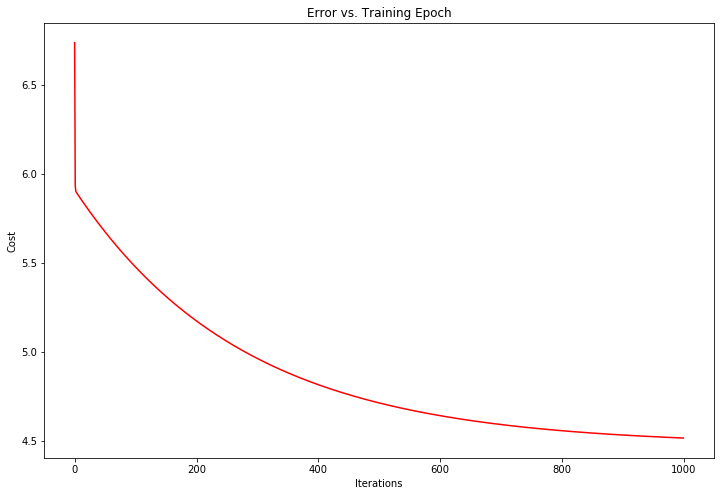

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()